In [28]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy import constants as const
from astropy import units as u

from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [84]:
#from fitting the Hoffman&Loeb distribution

mean = 2.87678065
stdev = 0.31454837

def trip_log_v():
    return st.norm.rvs(mean,stdev)


In [140]:
def v_scaled(m3,qout):

    q_HL = 1/10
    m3_HL = 10**7
    v_HL = trip_log_v()

    return (np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout))) * 10**(v_HL))

In [138]:
v_scaled(10**7,10**-2)

2.967434339951346


968.2109625845791

In [77]:
10**(trip_log_v(mean,stdev))

741.7525966270515

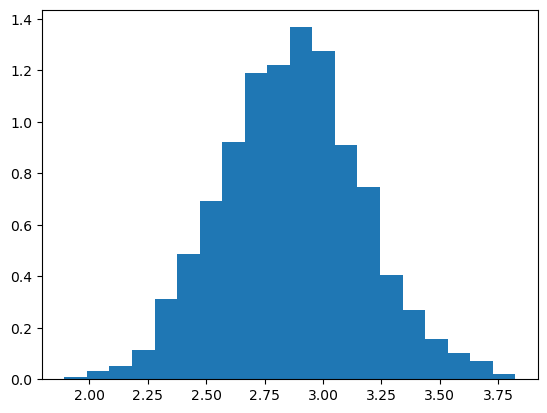

In [30]:
plt.hist(st.norm.rvs(mean,stdev,1000),bins=20,density=True)
plt.show()

In [37]:
df_trip = pd.read_csv("Data/triples-data-with-flags.csv",index_col= False)
df_trip.head()
t_triples = df_trip[(df_trip["Flag"] == "Tr-ej") | (df_trip["Flag"] == "No")]

In [56]:
np.shape(t_triples)[0]

377

In [62]:
np.sort([11,4,5,8])

array([ 4,  5,  8, 11])

In [141]:
kicked_BH = []
q_out = []
v_kick = []

for i in range(np.shape(t_triples)[0]):
    m1 = t_triples["Mass 1"].iloc[i]
    m2 = t_triples["Mass 2"].iloc[i]
    m3 = t_triples["Mass 3"].iloc[i]
    m_sort = np.sort([m1,m2,m3])

    m3 = m_sort[0]
    qout = m_sort[0]/(m_sort[1]+m_sort[2])
    kicked_BH.append(m3)
    q_out.append(qout)

    v_kick.append(v_scaled(m3,qout))


In [160]:
np.shape(v_kick)

(377,)

In [165]:
t_triples.insert(5,"Slingshot_kick",v_kick,True)

In [166]:
t_triples

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Slingshot_kick,Flag
0,0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,518.511388,No
2,2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,704.430926,No
3,3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,280.127072,No
4,4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,860.950034,No
7,7,9.436961e+06,1.002870e+06,4.551391e+08,9.469051e+09,2355.523183,No
...,...,...,...,...,...,...,...
523,523,1.244161e+11,5.273364e+08,1.252976e+09,1.272448e+10,37.840618,No
524,524,1.712377e+11,5.514613e+08,1.583394e+09,1.186029e+10,139.851117,No
525,525,5.533509e+08,1.844169e+07,2.757988e+08,1.108624e+10,657.322876,No
528,528,1.089103e+07,6.823273e+06,2.158876e+07,1.311330e+10,1416.961298,No


In [168]:
t_triples.to_csv("Data/triples-slingshot-data.csv",index=False)

In [158]:
v_kick = np.array(v_kick)
print(len(np.argwhere(v_kick>500))/len(v_kick))

0.6445623342175066


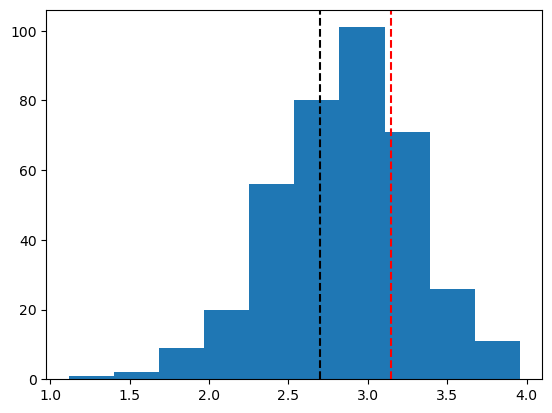

In [152]:
plt.hist(np.log10(v_kick))
plt.axvline(x=np.log10(500),color="black",linestyle="--")
plt.axvline(x=np.log10(1400),color="red",linestyle="--")